### Local Binary Pattern Example 3
### CS4243, Amir, 2023

In [1]:
import math as m
import cv2
import numpy as np
import random as rnd
from matplotlib import pyplot as plt

In [2]:
#img = cv2.imread('..\\cat_bw.bmp',0)
img = cv2.imread('..\\IMG_0054_1024.bmp',0)
#img = np.ones([64,64])
#img = np.random.randint(0,8,[128,128])

In [3]:
M = img.shape
lbpres = np.zeros(M)
M

(1024, 1024)

In [4]:
def lbpmask163(a,x,y):
    k = np.array( [ [ 0, 0 , 2**15 , 1 , 2 , 0 , 0 ] , 
                    [ 0 , 2**14 , 0 , 0 , 0 , 4 , 0] , 
                    [ 2**13 , 0, 0, 0, 0, 0, 8] , 
                    [ 2**12 , 0, 0, 0, 0, 0, 16] , 
                    [ 2**11 , 0 ,0 , 0, 0, 0, 32] , 
                    [ 0 , 2**10 , 0 , 0 , 0 , 64, 0] , 
                    [ 0, 0, 2**9 , 256, 128, 0, 0] ])

    msk1 = np.zeros([7,7])
    for i in range(7): 
        for j in range(7):
            msk1[i,j] = (a[i,j] >= a[x,y] )
    
    ''' print( '>>> ' , np.sum(msk1)) 
    #print( msk1 )
    print( np.matmul( msk1 , k))
    cv2.waitKey(0) '''
    ans = np.sum( np.matmul( msk1 , k) )
    # print(ans)
    return ans

In [5]:
for i in range(3,M[0]-3):
    for j in range(3,M[1]-3):
        lbpres[i,j] = lbpmask163(img,i,j)
                

In [6]:
lbpres = lbpres[ 3:M[0]-3 , 3:M[1]-3 ]

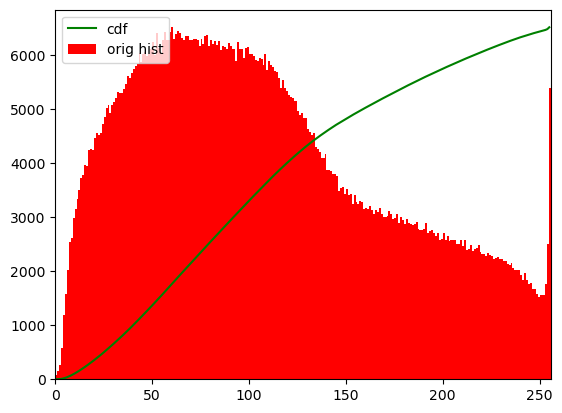

In [7]:
# original image histogram 
#
hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'g')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','orig hist'), loc = 'upper left')
plt.show()

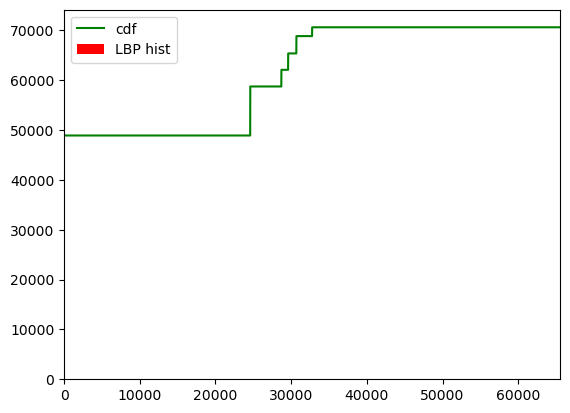

In [8]:
# LBP histogram 
#
hist,bins = np.histogram(lbpres.flatten(),2**16,[0,2**16])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'g')
plt.hist(lbpres.flatten(),2**16,[0,2**16], color = 'r')
plt.xlim([0,2**16])
plt.legend(('cdf','LBP hist'), loc = 'upper left')
plt.show()

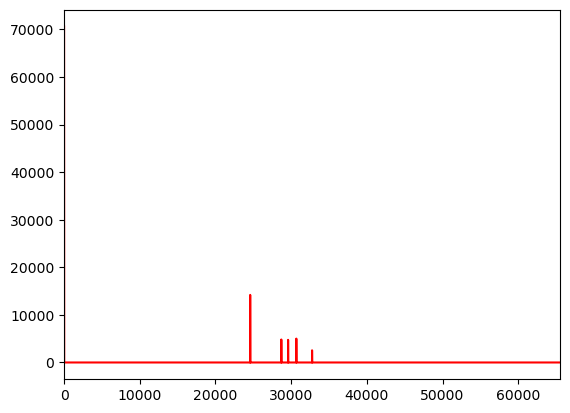

In [9]:
plt.plot(hist, color = 'r')
plt.xlim([0,2**16])
plt.show()

In [10]:
# showing the result
cv2.imshow("The Image" , np.uint8(img) )
cv2.imshow("LBP Matrix" , np.uint8(lbpres/256) )

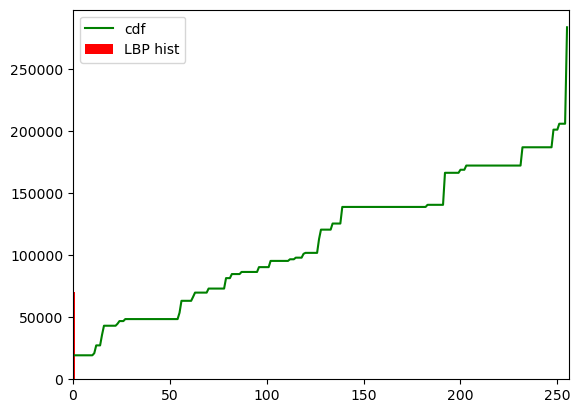

In [11]:
# LBP histogram 
#
lbpres2 = np.uint8( lbpres / 256 )
hist,bins = np.histogram(lbpres2.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'g')
plt.hist(lbpres.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','LBP hist'), loc = 'upper left')
plt.show()

In [12]:
cv2.waitKey(0)
cv2.destroyAllWindows() 

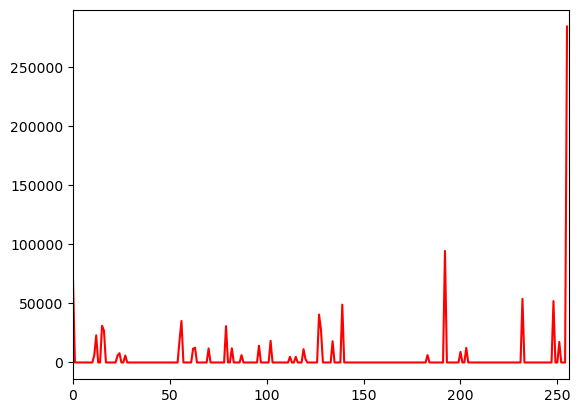

In [13]:
plt.plot(hist, color = 'r')
plt.xlim([0,256])
plt.show()